<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON611
### Final Exam - Take Home Project



---
#### Guidelines 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **20%** of your final exam score.
- You need to be part of a group with **3** students.
- The **take home project** is due on **DEC 9th 2019** before class/exam (if you are taking the in-class exam before the rest of the class, you **need to push your take home project** before you commence with the in-class exam) = **NO EXCUSES !!**
- The team leader will receive an email where he/she will uploading the team members names and a link to the notebook in GitHub.

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [3]:
pwd

'/Users/marcelonatale/Desktop/ECON611/ECON611/exams/final/final_project'

## 1. Load the data from file

---

In [4]:
iowa_path = '../../../database/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_path)

In [5]:
iowa.head(4)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77


## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [6]:
def explore_df(df):
    print('Number of rows: %d' % int(df.shape[0]))
    print('Number of columns: %d' % int(df.shape[1]))
    print("\n")
    print(df.info())
    print("\n")
    print(df.describe().T)
    
    return df

explore_df(iowa)

Number of rows: 270955
Number of columns: 18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53



## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [7]:
iowa
# Zip Code should be an integer
# County Number, Category should be an integer
# Can Remove Category
# State Bottle Cost and Retail, Sale should be floats; all have $ which is problematic

# FINDING NULL VALUES in County Number, County, Category, Category Name
NoCountyNum = pd.isnull(iowa['County Number'])
iowa[NoCountyNum]


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
135,01/20/2016,5222,CEDAR RAPIDS,52402,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,Paul Masson Grande Amber Brandy,375,$3.22,$4.83,24,$115.92,9.00,2.38
198,03/02/2016,3820,SIOUX CITY,51103,NaN,NaN,1032080.0,IMPORTED VODKA,35,34359,Grey Goose Vodka,200,$5.00,$7.50,12,$90.00,2.40,0.63
272,03/21/2016,4222,EVANSDALE,50707,NaN,NaN,1062300.0,FLAVORED RUM,370,42716,Malibu Coconut Rum,750,$7.49,$11.24,3,$33.72,2.25,0.59
290,03/21/2016,5236,ANAMOSA,52205,NaN,NaN,1081600.0,WHISKEY LIQUEUR,421,64868,Fireball Cinnamon Whiskey,1750,$15.33,$23.00,6,$138.00,10.50,2.77
321,02/23/2016,4203,WAVERLY,50677,NaN,NaN,1051100.0,APRICOT BRANDIES,434,55084,Paramount Blackberry Brandy,375,$3.55,$5.33,24,$127.92,9.00,2.38
863,01/11/2016,2460,HAMPTON,50441,NaN,NaN,1011200.0,STRAIGHT BOURBON WHISKIES,461,77776,Wild Turkey American Honey,750,$10.50,$15.75,3,$47.25,2.25,0.59
964,05/19/2015,4247,BELMOND,50421,NaN,NaN,1012100.0,CANADIAN WHISKIES,55,12408,Canadian Ltd Whisky,1750,$9.14,$13.71,6,$82.26,10.50,2.77
982,03/30/2016,5222,CEDAR RAPIDS,52402,NaN,NaN,1031080.0,VODKA 80 PROOF,300,36904,Mccormick Vodka Pet,375,$1.80,$2.70,24,$64.80,9.00,2.38
1024,03/23/2016,3820,SIOUX CITY,51103,NaN,NaN,1081390.0,IMPORTED SCHNAPPS,421,69637,Dr. Mcgillicuddy's Cherry Schnapps,1000,$11.00,$16.50,24,$396.00,24.00,6.34
1630,02/10/2016,5224,CORALVILLE,52241,NaN,NaN,1062310.0,SPICED RUM,260,43337,Captain Morgan Spiced Rum,1000,$11.75,$17.63,12,$211.56,12.00,3.17


### 3.2 Clean the columns

In [8]:
iowa = iowa.dropna() #removing all rows with missing data
iowa.describe().T
iowa['County Number'] = iowa['County Number'].astype(int) #Change to Int type
iowa['Category'] = iowa['Category'].astype(int)

iowa['State Bottle Cost'] = iowa['State Bottle Cost'].map(lambda x: x.lstrip('$')) #Remove $ from prices
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].map(lambda x: x.lstrip('$'))
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].map(lambda x: x.lstrip('$'))

iowa['State Bottle Cost'] = iowa['State Bottle Cost'].astype(float) #Change to Float type
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].astype(float)
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].astype(float)

iowa.info()

/Users/marcelonatale/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/marcelonatale/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/marcelonatale/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269258 entries, 0 to 270954
Data columns (total 18 columns):
Date                     269258 non-null object
Store Number             269258 non-null int64
City                     269258 non-null object
Zip Code                 269258 non-null object
County Number            269258 non-null int64
County                   269258 non-null object
Category                 269258 non-null int64
Category Name            269258 non-null object
Vendor Number            269258 non-null int64
Item Number              269258 non-null int64
Item Description         269258 non-null object
Bottle Volume (ml)       269258 non-null int64
State Bottle Cost        269258 non-null float64
State Bottle Retail      269258 non-null float64
Bottles Sold             269258 non-null int64
Sale (Dollars)           269258 non-null float64
Volume Sold (Liters)     269258 non-null float64
Volume Sold (Gallons)    269258 non-null float64
dtypes: float64(5), int64(7


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [9]:
#Looking at the rest of the problems, we do not need Zip Code, Volume Sold (Liters), Item Description, Bottle Volume (ml)
iowa = iowa.drop(['Zip Code', 'Volume Sold (Liters)', 'Vendor Number', 'Bottle Volume (ml)'], axis = 1)
iowa.shape

(269258, 14)


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [10]:
# Sorting of date
iowa.head(5)
iowa = iowa.sort_values(by='Date', ascending=False)
iowa['year'] = iowa['Date'].astype(str).str[6:].astype(int) # Extracting year from all the dates
iowa['month'] = iowa['Date'].astype(str).str[0:2].astype(int) # Extracting month from all the dates
iowa2015 = iowa.loc[iowa['year'] == 2015]  # Getting the list of entries from year '2015'
temp_store = iowa2015.groupby(['Store Number','month'],as_index=False).count() # Grouping all the stores with their months
temp_month= temp_store.groupby('Store Number').count() # Getting count of months in each store
closed_store = temp_month.loc[temp_month['month'] != 12].reset_index() # Getting records with months not equal to 12
stores = closed_store['Store Number'] # Getting the list of the stores less than 12 months
result = iowa2015[~iowa2015['Store Number'].isin(list(stores))]  # Removing all the stores with open for less than 12 months
result

,Date,Store Number,City,County Number,County,Category,Category Name,Item Number,Item Description,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),year,month
205347,12/31/2015,4165,ANKENY,77,Polk,1031200,VODKA FLAVORED,41704,Uv Red (cherry) Vodka,6.50,9.75,2,19.50,0.40,2015,12
121947,12/31/2015,9002,LECLAIRE,82,Scott,1081200,CREAM LIQUEURS,80236,Iowish Cream Liqueur,10.17,15.26,408,6226.08,80.84,2015,12
92124,12/31/2015,4617,DES MOINES,77,Polk,1071100,AMERICAN COCKTAILS,57148,Chi-Chi's Margarita W/tequila,6.00,9.25,2,18.50,0.92,2015,12
25176,12/31/2015,4374,GRIMES,77,Polk,1012100,CANADIAN WHISKIES,11771,Black Velvet Mini,6.80,10.20,2,20.40,0.32,2015,12
149323,12/31/2015,4725,ANKENY,77,Polk,1011100,BLENDED WHISKIES,25606,Seagrams 7 Crown Bl Whiskey,7.00,10.50,6,63.00,1.19,2015,12
133753,12/31/2015,4725,ANKENY,77,Polk,1031080,VODKA 80 PROOF,37996,Smirnoff Vodka 80 Prf,8.25,12.38,6,74.28,1.19,2015,12
164408,12/31/2015,4374,GRIMES,77,Polk,1031080,VODKA 80 PROOF,38008,Smirnoff Vodka 80 Prf Pet,14.75,22.13,6,132.78,2.77,2015,12
174554,12/31/2015,4165,ANKENY,77,Polk,1012100,CANADIAN WHISKIES,11774,Black Velvet,3.07,4.61,4,18.44,0.40,2015,12
228716,12/31/2015,5089,MISSOURI VALLEY,43,Harrison,1032080,IMPORTED VODKA,34001,Absolut Swedish Vodka 80 Prf Mini,7.92,11.88,10,118.80,1.59,2015,12
264182,12/31/2015,4617,DES MOINES,77,Polk,1062200,PUERTO RICO & VIRGIN ISLANDS RUM,45245,Paramount Gold Rum Traveler,4.00,6.00,3,18.00,0.59,2015,12



## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [11]:
VolumeSold = result.groupby(['Store Number', 'year'], as_index=False)[['Bottles Sold']].sum().reset_index() #Group by store number and sum the bottles sold by that store
VolumeSold

,index,Store Number,year,Bottles Sold
0,0,2106,2015,10355
1,1,2113,2015,671
2,2,2130,2015,7418
3,3,2152,2015,573
4,4,2178,2015,1928
5,5,2190,2015,11111
6,6,2191,2015,7696
7,7,2200,2015,1668
8,8,2205,2015,1880
9,9,2228,2015,1312


### 5.2 Calculate the profit each store is making in 2015.


In [12]:
result['State Bottle Retail'] = result['State Bottle Retail'].astype(str).str[1:].astype(float)
result['State Bottle Cost'] = result['State Bottle Cost'].astype(str).str[1:].astype(float)
VolumeSold['Profit'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost'])*VolumeSold['Bottles Sold'] #Profit is (P-C)*Q

'''Pulling in necessary columns'''
VolumeSold['Volume Sold (Gallons)']= iowa['Volume Sold (Gallons)'] 
VolumeSold['County Number'] = iowa['County Number']
VolumeSold[['Store Number','Bottles Sold', 'Profit', 'Volume Sold (Gallons)', 'County Number']]
result['Profit'] = (iowa['State Bottle Retail'] - iowa['State Bottle Cost'])*result['Bottles Sold'] # Bringing Profit to result df
result

/Users/marcelonatale/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/marcelonatale/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/marcelonatale/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,Date,Store Number,City,County Number,County,Category,Category Name,Item Number,Item Description,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),year,month,Profit
205347,12/31/2015,4165,ANKENY,77,Polk,1031200,VODKA FLAVORED,41704,Uv Red (cherry) Vodka,0.50,0.75,2,19.50,0.40,2015,12,6.50
121947,12/31/2015,9002,LECLAIRE,82,Scott,1081200,CREAM LIQUEURS,80236,Iowish Cream Liqueur,0.17,5.26,408,6226.08,80.84,2015,12,2076.72
92124,12/31/2015,4617,DES MOINES,77,Polk,1071100,AMERICAN COCKTAILS,57148,Chi-Chi's Margarita W/tequila,0.00,0.25,2,18.50,0.92,2015,12,6.50
25176,12/31/2015,4374,GRIMES,77,Polk,1012100,CANADIAN WHISKIES,11771,Black Velvet Mini,0.80,0.20,2,20.40,0.32,2015,12,6.80
149323,12/31/2015,4725,ANKENY,77,Polk,1011100,BLENDED WHISKIES,25606,Seagrams 7 Crown Bl Whiskey,0.00,0.50,6,63.00,1.19,2015,12,21.00
133753,12/31/2015,4725,ANKENY,77,Polk,1031080,VODKA 80 PROOF,37996,Smirnoff Vodka 80 Prf,0.25,2.38,6,74.28,1.19,2015,12,24.78
164408,12/31/2015,4374,GRIMES,77,Polk,1031080,VODKA 80 PROOF,38008,Smirnoff Vodka 80 Prf Pet,4.75,2.13,6,132.78,2.77,2015,12,44.28
174554,12/31/2015,4165,ANKENY,77,Polk,1012100,CANADIAN WHISKIES,11774,Black Velvet,0.07,0.61,4,18.44,0.40,2015,12,6.16
228716,12/31/2015,5089,MISSOURI VALLEY,43,Harrison,1032080,IMPORTED VODKA,34001,Absolut Swedish Vodka 80 Prf Mini,0.92,1.88,10,118.80,1.59,2015,12,39.60
264182,12/31/2015,4617,DES MOINES,77,Polk,1062200,PUERTO RICO & VIRGIN ISLANDS RUM,45245,Paramount Gold Rum Traveler,0.00,0.00,3,18.00,0.59,2015,12,6.00


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [13]:
VolumeSold['Ratio'] = (VolumeSold['Profit'] / VolumeSold['Volume Sold (Gallons)']) # Creating a column for the ratio of profit/gallon
gpi = VolumeSold.groupby(['County Number'])[['Ratio']].apply(np.sum)
gpi_1 = gpi.sort_values(by= 'Ratio', ascending=False) 
gpi_1.head()
# The top 5 counties in terms of profit/gallon are 77, 7, 57, 52, 82

,Ratio
County Number,
77.0,3.082104e+06
7.0,1.419902e+06
57.0,1.191304e+06
52.0,8.042540e+05
82.0,6.708366e+05


### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

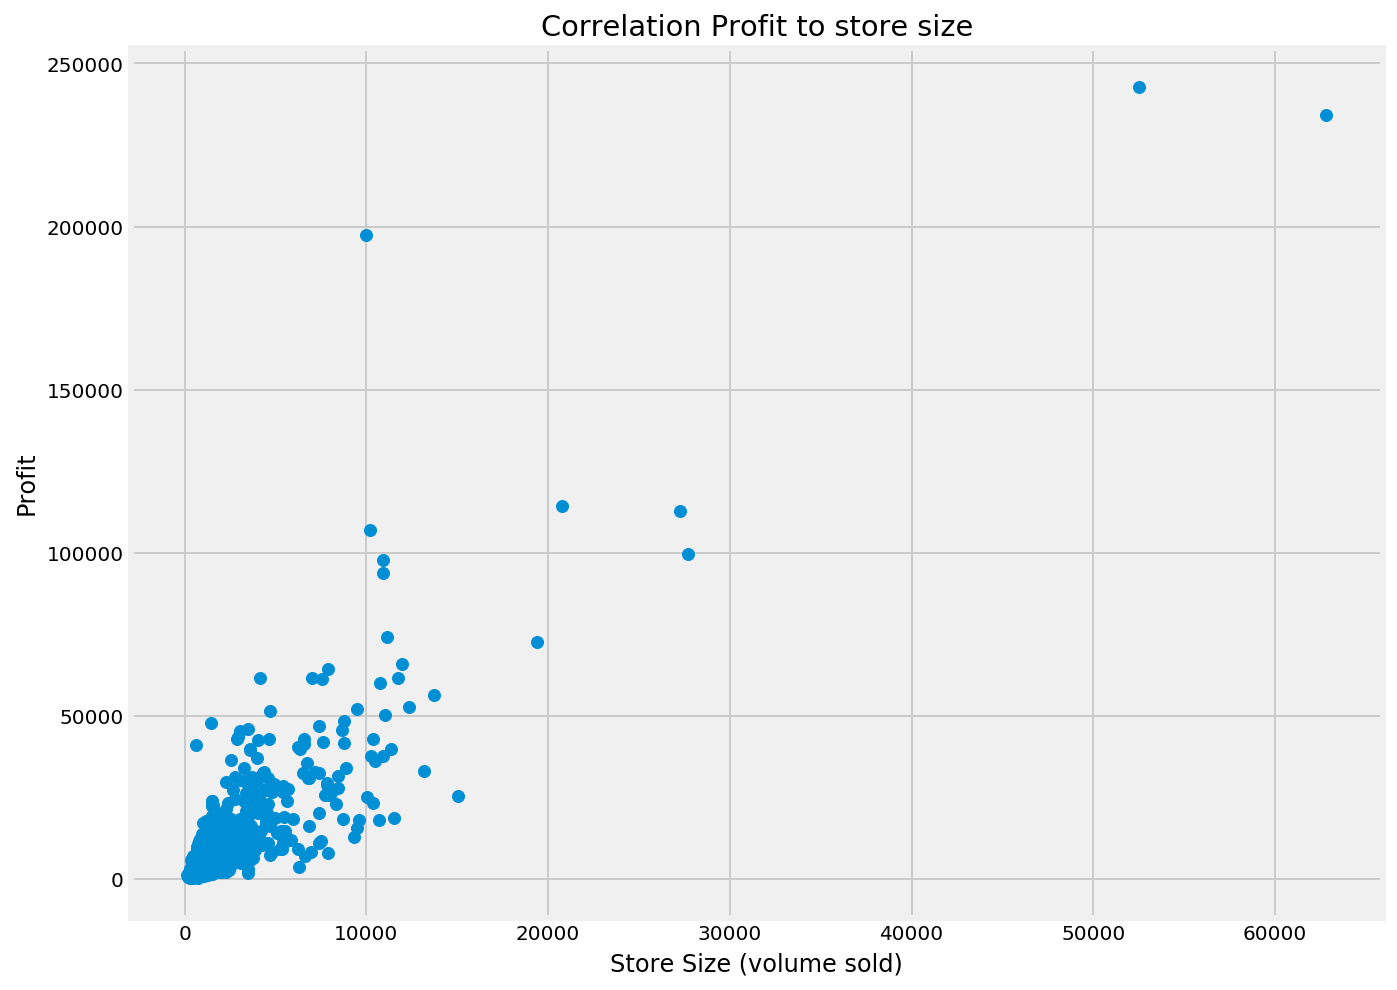

In [14]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.title('Correlation Profit to store size')
plt.xlabel("Store Size (volume sold)")
plt.ylabel("Profit")
plt.scatter(VolumeSold['Bottles Sold'], VolumeSold['Profit']) #Shows corr between Store Size and Profit
plt.show()

# We see a strongly positive corelation

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [16]:
group = result.groupby(['Category Name'])
group.groups
result['American'] = result['Category Name'].str.contains("AMERICAN")
#True for american and false for imported liquors.
result

C:\Users\zumel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Store Number,City,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),year,month,Profit,American
205347,12/31/2015,4165,ANKENY,77,Polk,1031200,VODKA FLAVORED,380,41704,Uv Red (cherry) Vodka,0.50,0.75,2,19.50,0.40,2015,12,6.50,False
121947,12/31/2015,9002,LECLAIRE,82,Scott,1081200,CREAM LIQUEURS,306,80236,Iowish Cream Liqueur,0.17,5.26,408,6226.08,80.84,2015,12,2076.72,False
92124,12/31/2015,4617,DES MOINES,77,Polk,1071100,AMERICAN COCKTAILS,55,57148,Chi-Chi's Margarita W/tequila,0.00,0.25,2,18.50,0.92,2015,12,6.50,True
25176,12/31/2015,4374,GRIMES,77,Polk,1012100,CANADIAN WHISKIES,115,11771,Black Velvet Mini,0.80,0.20,2,20.40,0.32,2015,12,6.80,False
149323,12/31/2015,4725,ANKENY,77,Polk,1011100,BLENDED WHISKIES,260,25606,Seagrams 7 Crown Bl Whiskey,0.00,0.50,6,63.00,1.19,2015,12,21.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242669,01/05/2015,4184,MUSCATINE,70,Muscatine,1051010,AMERICAN GRAPE BRANDIES,259,52316,Christian Bros Brandy,0.92,0.88,3,26.64,0.59,2015,1,8.88,True
55570,01/05/2015,5001,INDEPENDENCE,10,Buchanan,1081390,IMPORTED SCHNAPPS,421,69638,Dr. Mcgillicuddy's Cherry Schnapps,4.66,1.99,1,21.99,0.46,2015,1,7.33,False
4350,01/05/2015,2605,CEDAR RAPIDS,57,Linn,1081390,IMPORTED SCHNAPPS,260,65065,Goldschlager Cinnamon Schnapps,0.13,0.70,1,10.70,0.10,2015,1,3.57,False
47582,01/05/2015,5071,DURANT,16,Cedar,1031200,VODKA FLAVORED,380,41989,Uv Cake Vodka,0.50,0.75,4,39.00,0.79,2015,1,13.00,False


### 5.6 Do relationships exist between the broader liquor type and profit?

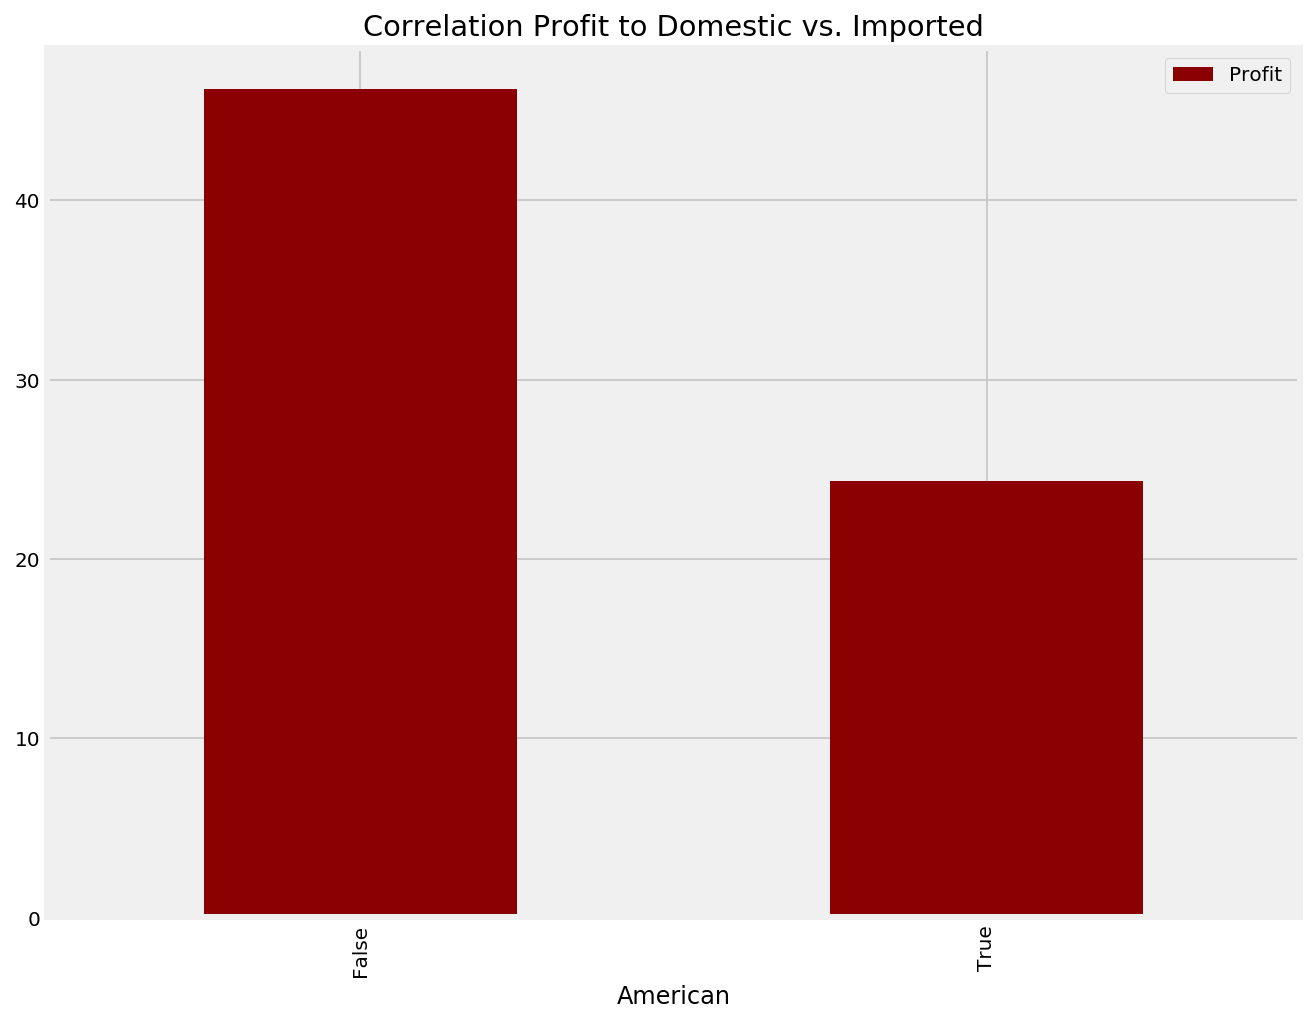

In [17]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.title('Correlation Profit to Domestic vs. Imported')
plt.xlabel("Domestic vs. Imported, by store")
result.groupby(['American'])[['Profit']].mean().plot(kind="bar", 
                                                        color=['darkred', 'steelblue'],
                                                        ax=ax) #Creates a bar graph for the average profit of imported and domestic brands
plt.show()

#On average, imported liquors profit more compared to the domestic ones.




### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [45]:
BYBRAND = iowa.groupby('Item Description')[['Bottles Sold']].sum().reset_index() #Creating a new df looking at brands
for brand in BYBRAND['Item Description']:
    BYBRAND['RevenuePerBottle'] = iowa['State Bottle Retail'] - iowa['State Bottle Cost'] # Each brand brings in a revenue of retail-cost
    BYBRAND['Item Number'] = iowa['Item Number']
    
BYBRAND['Profit'] = BYBRAND['Bottles Sold'] * BYBRAND['RevenuePerBottle'] # Profit for each brand is Rev*Q
BYBRAND = BYBRAND.dropna() #Dropping missing data

In [46]:
BYBRAND.sort_values(by=['Bottles Sold'])

,Item Description,Bottles Sold,RevenuePerBottle,Item Number,Profit
821,Five Star Pegasus,1,0.87,26822.0,0.87
1508,Paul Masson Red Berry Grande Amber Mini,1,6.00,34876.0,6.00
1793,Skyy Coastal Cranberry Mini,1,3.59,36308.0,3.59
1799,Skyy Infusions Pacific Blueberry Mini,1,6.25,87409.0,6.25
376,Calumet Farm Bourbon VAP,1,4.25,65200.0,4.25
1106,Jim Beam Signature Craft 12YR,1,2.09,35917.0,2.09
1919,Svedka 100 Prf,1,4.75,59161.0,4.75
938,Hangar One Citron,1,2.03,76487.0,2.03
1359,Minnesota 14,1,9.05,27102.0,9.05
956,Hennessy 250 Collector Blend HA,1,5.23,11788.0,5.23


In [47]:
BYBRAND.sort_values(by=['Profit'])

,Item Description,Bottles Sold,RevenuePerBottle,Item Number,Profit
821,Five Star Pegasus,1,0.87,26822.0,0.87
1218,Kru Pistachio Mini,1,1.14,81204.0,1.14
1270,Macallan Rare Cask HA,3,0.45,64870.0,1.35
785,Ezra Brooks Single Barrel,3,0.49,32232.0,1.47
1543,Penthouse Spirits Cherry for Him,1,1.67,36305.0,1.67
1879,Spiked Apple Spirits,1,1.69,35916.0,1.69
1716,Salvador's Strawberry Margarita 200ml-4Pack,1,1.70,31656.0,1.70
938,Hangar One Citron,1,2.03,76487.0,2.03
316,Bowmore 18YR HA,1,2.09,35917.0,2.09
1106,Jim Beam Signature Craft 12YR,1,2.09,35917.0,2.09


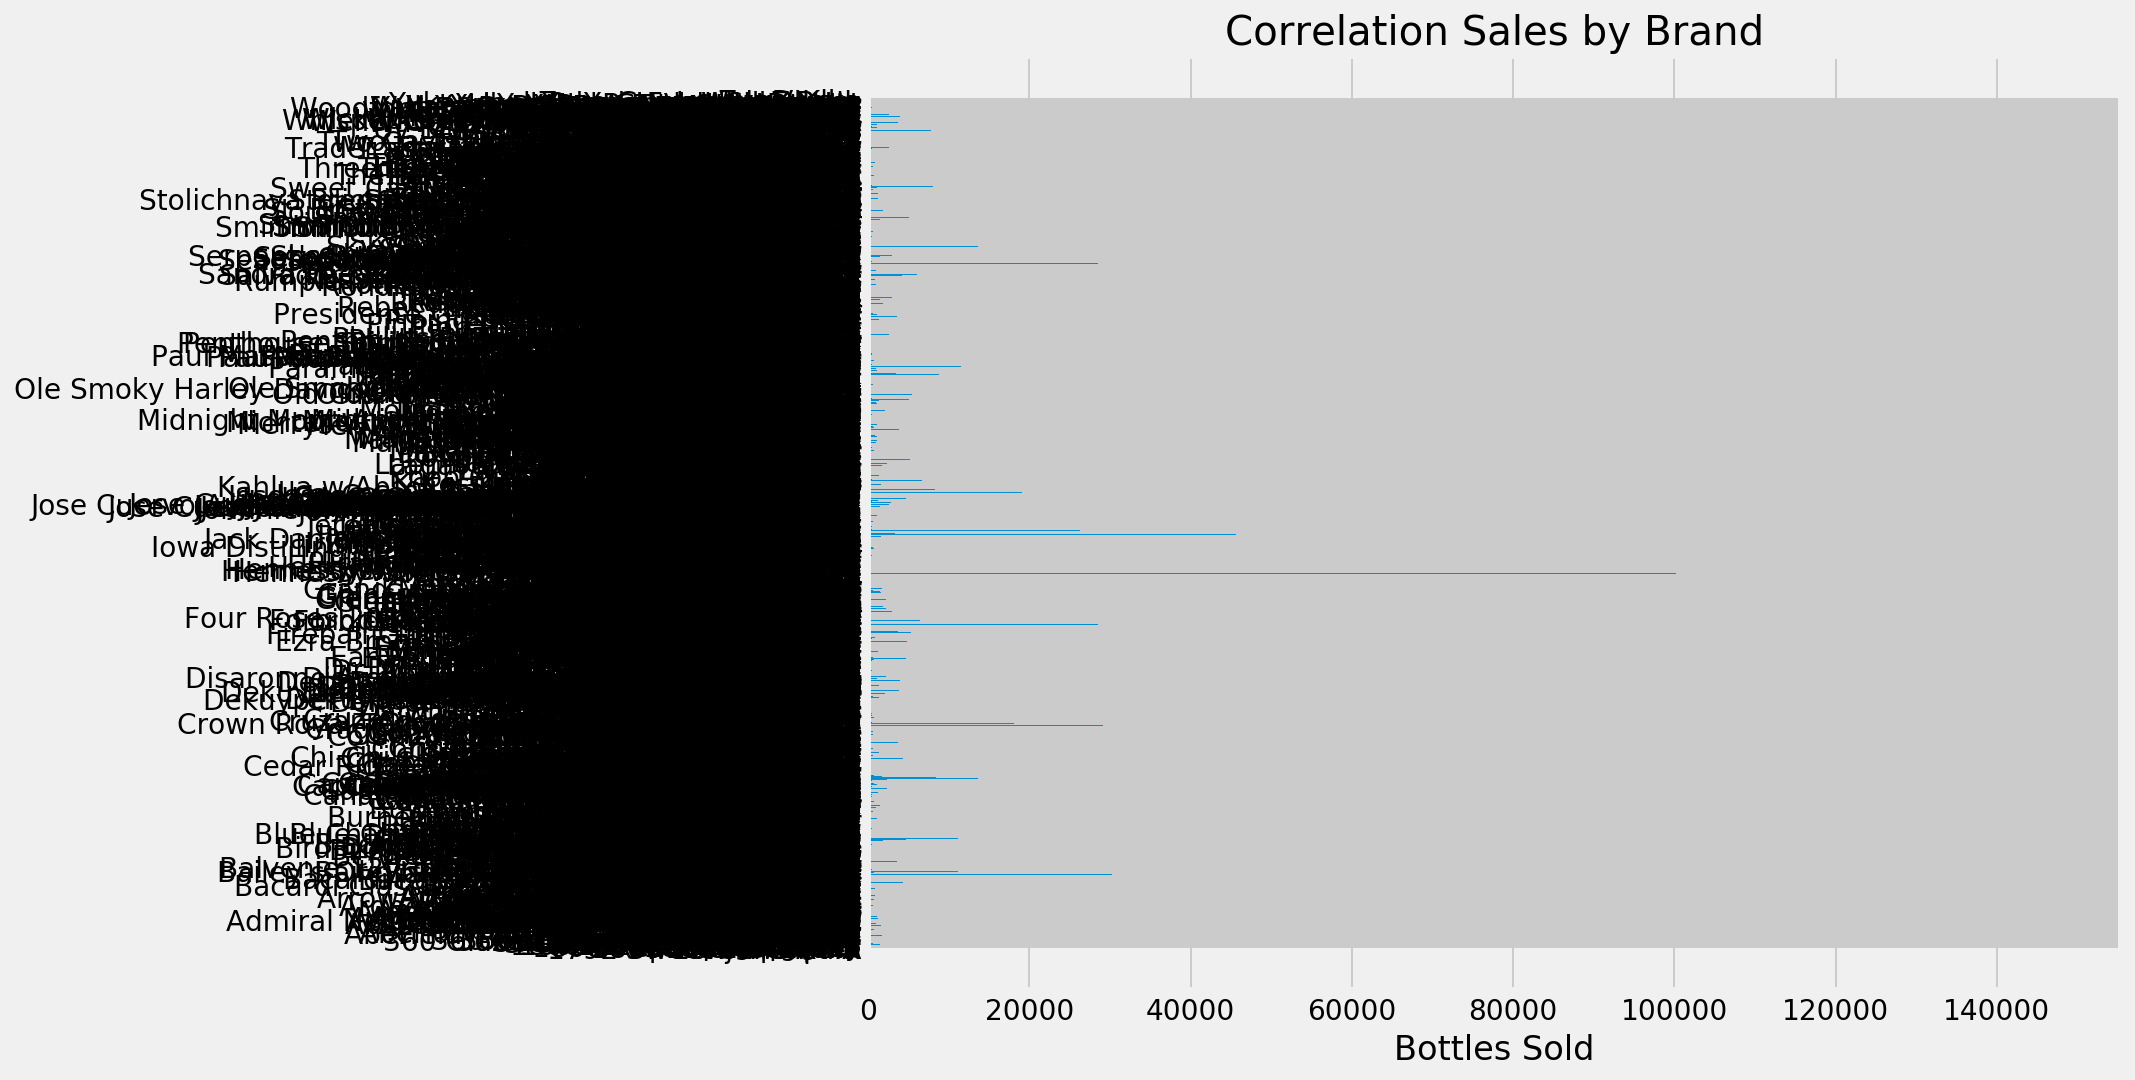

In [51]:
'''Plotting sales and profit by brand'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.title('Correlation Sales by Brand')
plt.xlabel("Bottles Sold")
plt.barh(BYBRAND['Item Description'], BYBRAND['Bottles Sold']) 
plt.show()

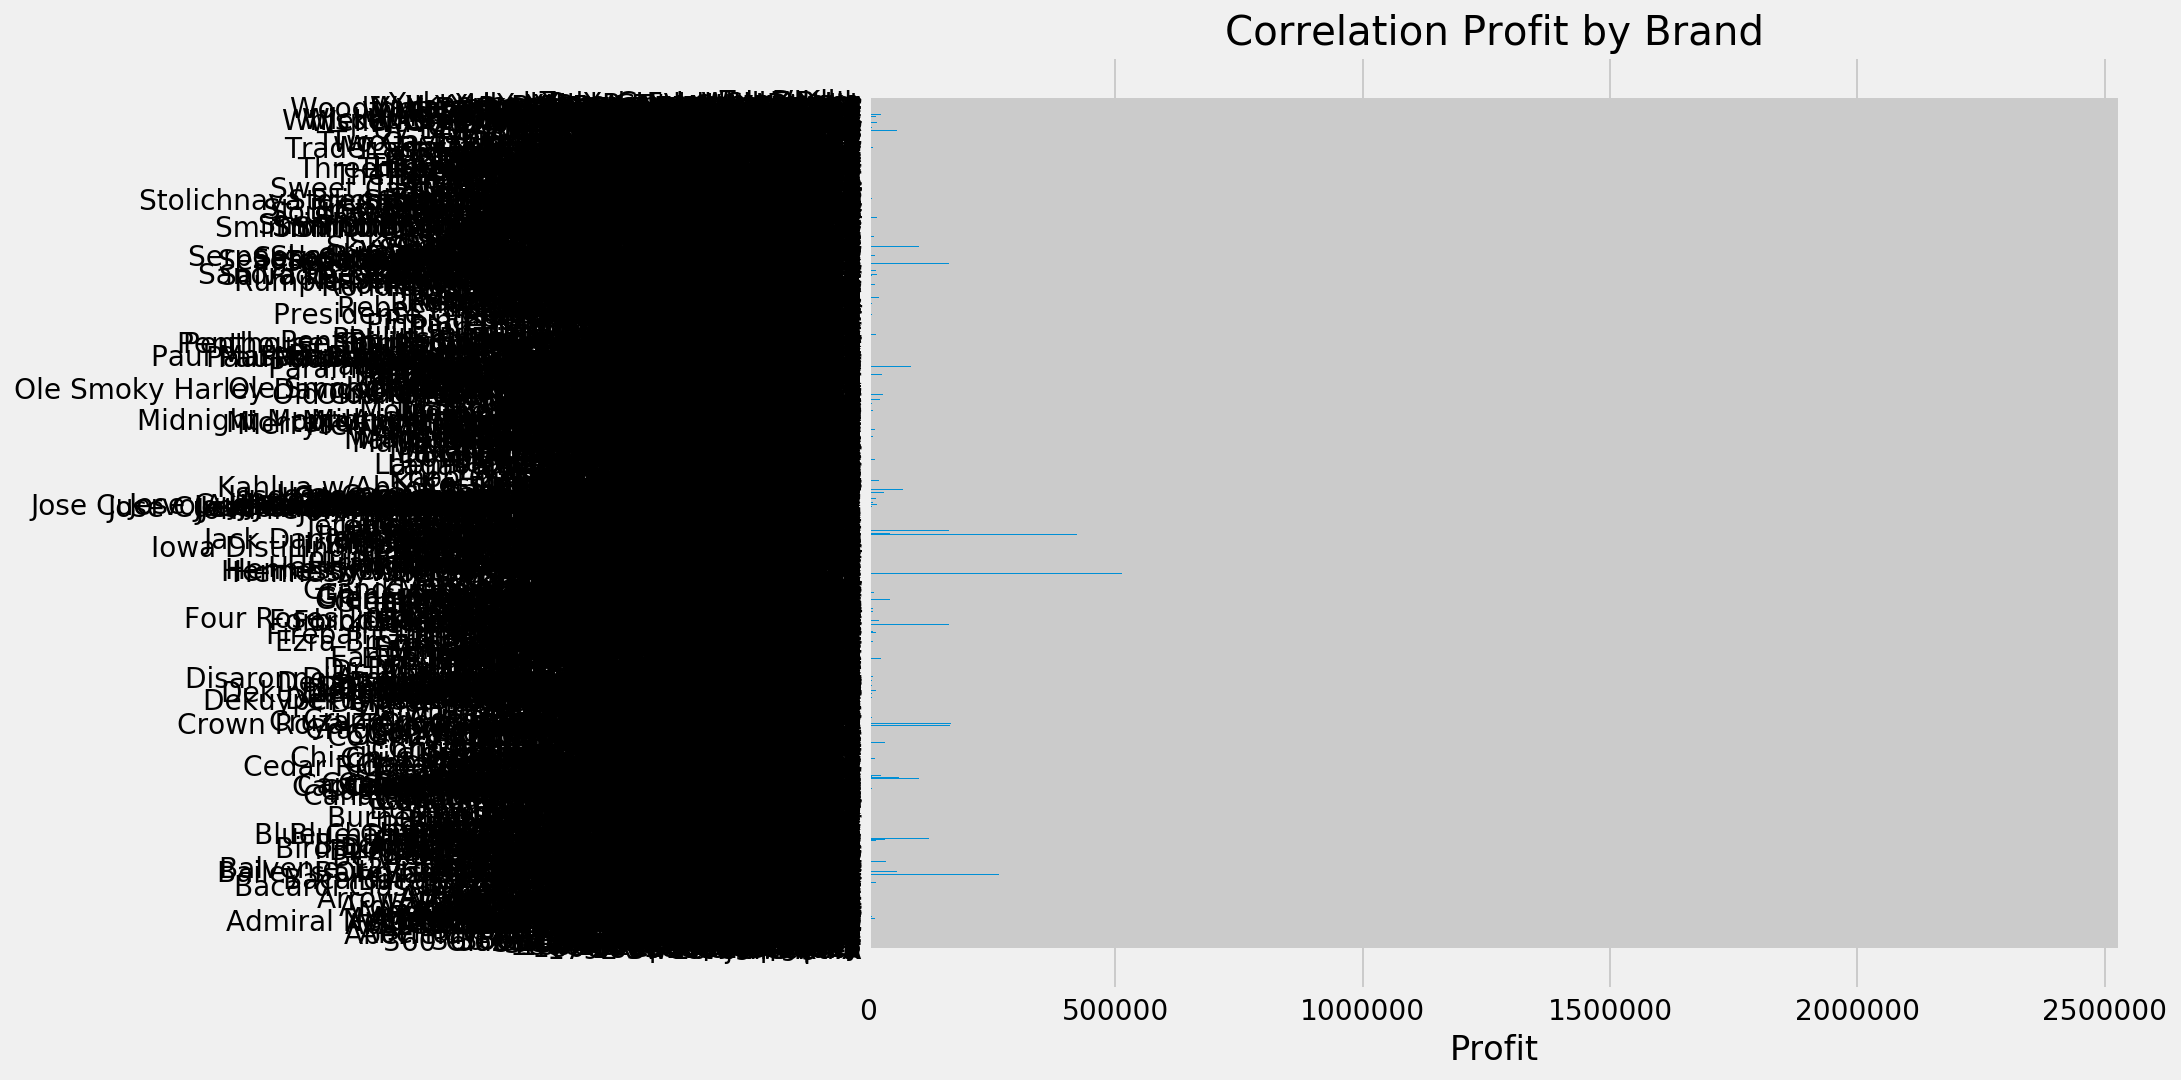

In [52]:
'''Plotting sales and profit by brand'''
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.title('Correlation Profit by Brand')
plt.xlabel("Profit")
plt.barh(BYBRAND['Item Description'], BYBRAND['Profit']) 
plt.show()

# Through the analysis of the data and these charts, we see no relationship between which brands sell more bottles and which brands bring in more profit!

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

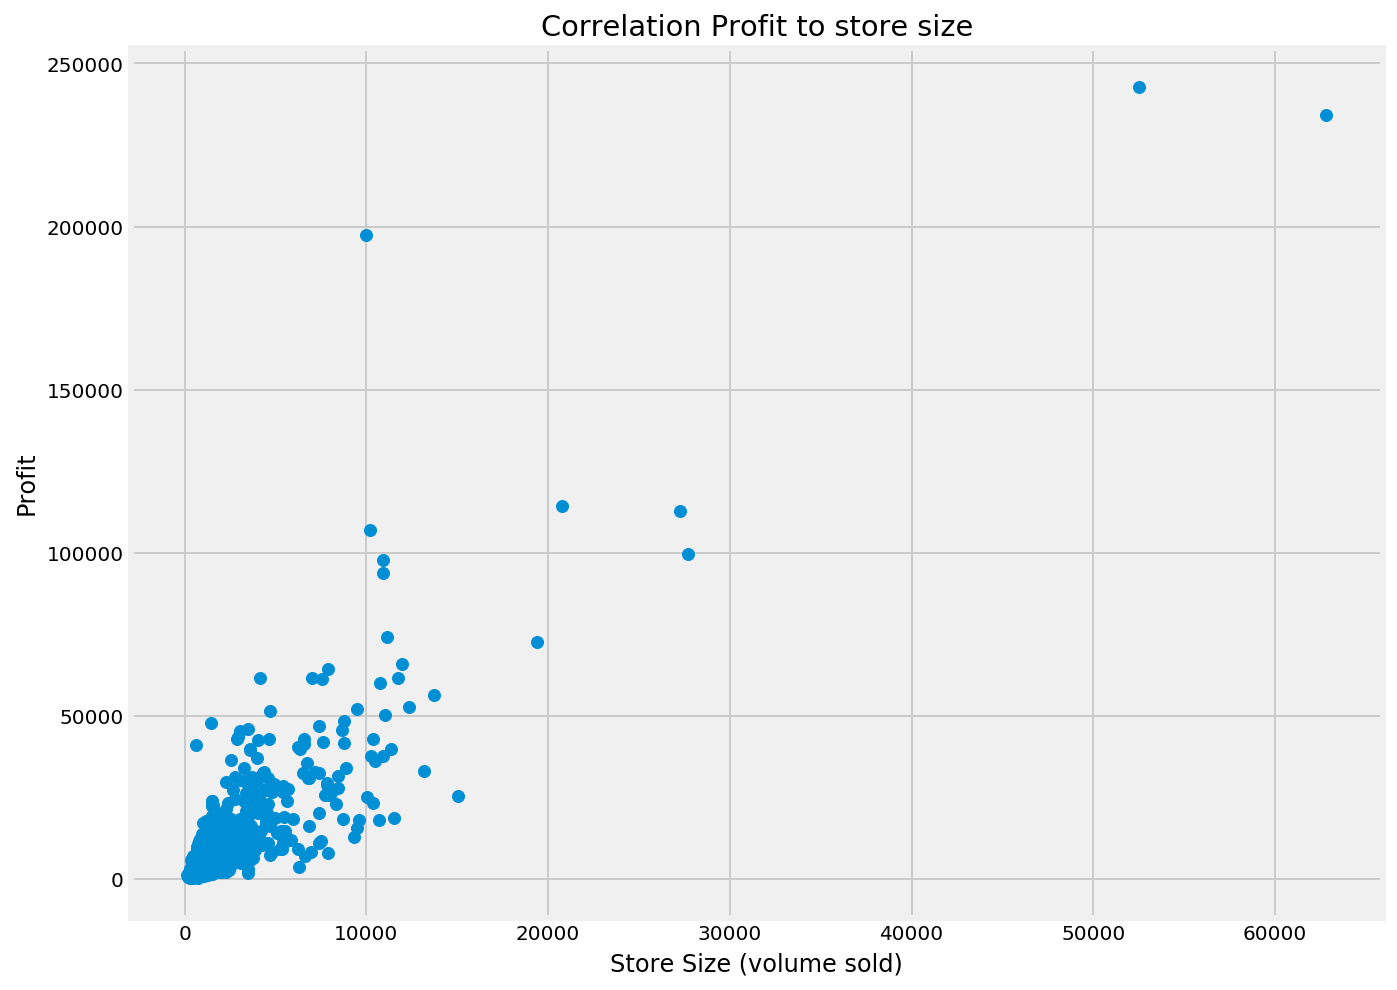

In [15]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.title('Correlation Profit to store size')
plt.xlabel("Store Size (volume sold)")
plt.ylabel("Profit")
plt.scatter(VolumeSold['Bottles Sold'], VolumeSold['Profit']) #Shows corr between Store Size and Profit
plt.show()

# As we see in the plot below, there's a strong positive correlation between store size and profits. Therefore, a progressive bracket tax on profits will effectively tax larger stores more than smaller stores.



## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?